# Introduction to machine learning

## Step 0: Improrting necessary libraries

In [157]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Step 2: Preparing dataset

In [158]:
data = {
    'ages': [19, 20, 23, 23, 25, 25, 22, 20, 19, 21],
    'study_hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'score': [52, 53, 61, 63, 70, 72, 77, 82, 89, 95]
}
df = pd.DataFrame(data)
df


,ages,study_hours,score
0,19,1,52
1,20,2,53
2,23,3,61
3,23,4,63
4,25,5,70
5,25,6,72
6,22,7,77
7,20,8,82
8,19,9,89
9,21,10,95


In [159]:
df.shape

(10, 3)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ages         10 non-null     int64
 1   study_hours  10 non-null     int64
 2   score        10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes


## Step 2: Define features (X) and label (y)

In [161]:
X = df[['study_hours']]  # Features must be 2D
y = df['score'] # Target / label

In [162]:
X

,study_hours
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [163]:
type(X)

pandas.core.frame.DataFrame

In [164]:
y

0    52
1    53
2    61
3    63
4    70
5    72
6    77
7    82
8    89
9    95
Name: score, dtype: int64

In [165]:
type(y)

pandas.core.series.Series

## Step 3: Split data into training and testing sets

Splitting the dataset using `train_test_split()`.

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
This line is used in **machine learning** to split your dataset into **training** and **testing** sets. It helps you evaluate how well your model performs on **unseen data**.

 🧾 Parameters explained:
- **`X`**: The features — input variables you use to make predictions.
- **`y`**: The target — the variable you're trying to predict.

 ⚙️ `train_test_split` arguments:
- **`test_size=0.2`**:  
  - 20% of the data will be used for testing.  
  - 80% will be used for training.  
  - ✅ **Default**: If not specified, the function will use `test_size=0.25` (25% test, 75% train).

- **`random_state=42`**:  
  - Sets the seed for random number generation to ensure **reproducibility**.  
  - Any integer can be used; `42` is just a commonly used example.

📤 Output Variables:
- `X_train`: Training features  
- `X_test`: Testing features  
- `y_train`: Training labels  
- `y_test`: Testing labels

🔍 Why use it?
- To **train** your model on one part of the data.
- To **test** how well it performs on new, **unseen** data.
- Prevents overfitting by simulating real-world usage.


In [188]:
# Step 3: Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: Create and train the model
In this case, we train the Linear Regression model

In [189]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [190]:
X_test

,study_hours
8,9
1,2


## Step 5: Prediction on Test
Make predictions on the test set

In [191]:
y_pred = model.predict(X_test)
print(y_pred)
print(f"Predicted Score for 9 hours of study: {y_pred[0]:.2f}")
print(f"Predicted Score for 2 hours of study: {y_pred[1]:.2f}")

[88.11515152 54.68484848]
Predicted Score for 9 hours of study: 88.12
Predicted Score for 2 hours of study: 54.68


## Step 6: Evaluate the model


 🔢 **Test Predictions**:  
```python
Test Predictions: [88.11515152, 54.68484848]
```
These are the **predicted exam scores** for the test set (i.e., the data your model didn't see during training):
- One student (maybe with ~9 hours of study) is predicted to score **88.12**
- Another student (maybe with ~2 hours of study) is predicted to score **54.68**
These predictions are based on the **learned linear relationship** between study hours and scores.

**Mean Squared Error (MSE)**:  
```python
Mean Squared Error: 1.81
```
MSE measures the **average of the squared differences** between actual and predicted values. Smaller is better.

- MSE = 1.81 means that, **on average**, the model's predictions are off by about **√1.81 ≈ 1.34 points** on the exam — which is very accurate for this type of problem!


 **R² Score (Coefficient of Determination)**:  
```python
R2 Score: 0.99
```
R² measures how well your model explains the variance in the data.

- **R² = 1.0** means perfect prediction.
- **R² = 0.99** means that **99% of the variation in scores is explained by the model** using study hours.

👉 In other words: your model is **extremely good** at capturing the relationship between hours studied and scores.

---

 ✅ Summary:

| Metric                | Value         | Interpretation                                     |
|-----------------------|---------------|----------------------------------------------------|
| Predictions           | [88.12, 54.68] | Estimated scores for unseen data                  |
| Mean Squared Error    | 1.81           | Very low error — predictions are close to actual  |
| R² Score              | 0.99           | Model explains 99% of score variation             |


In [192]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Predictions:", y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Test Predictions: [88.11515152 54.68484848]
Mean Squared Error: 1.81
R2 Score: 0.99


## Step 7: Visualize the data

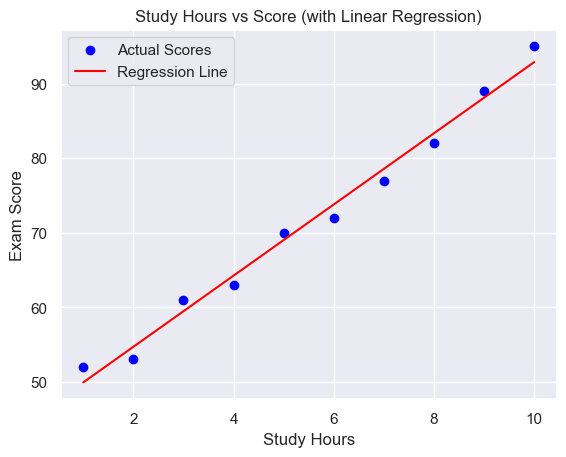

In [198]:
plt.scatter(X, y, color='blue', label='Actual Scores')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Score (with Linear Regression)')
plt.legend()
plt.show()
